# 선형 svm

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches 

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data = pd.read_csv('Bank.csv')
print(data.shape)
data.head()

(44700, 14)


,age,balance,duration,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing,loan,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,261,1,0,0,1,0,1,0,0,0,1,0
1,44,29,151,0,1,1,0,0,1,0,0,0,1,0
2,33,2,76,1,0,1,0,0,1,1,0,0,1,0
3,47,1506,92,1,0,0,0,1,1,0,0,0,1,0
4,33,1,198,0,1,0,0,1,0,0,0,0,1,0


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

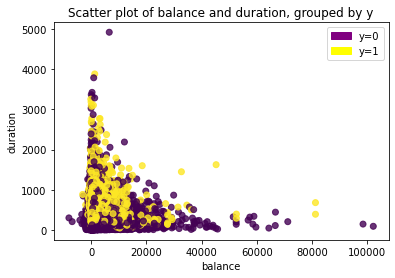

In [6]:
plt.scatter(X.iloc[:,1],X.iloc[:,2],c=y,alpha=.8)

plt.title('Scatter plot of balance and duration, grouped by y')
plt.xlabel('balance')
plt.ylabel('duration')
patch0 = mpatches.Patch(color='purple', label='y=0')
patch1 = mpatches.Patch(color='yellow', label='y=1')
plt.legend(handles=[patch0, patch1])
plt.savefig('Bank.png', dpi=300)
plt.show()

분할 및 표준화

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [9]:
print(np.mean(X_train_std), np.std(X_train_std))
print(np.mean(X_test_std), np.std(X_test_std))

-1.428876165527846e-17 1.0
-0.0006284066412707403 0.9981664849408013


학습

In [10]:
svm = SVC(kernel='linear')
svm.fit(X_train_std, y_train)

SVC(kernel='linear')

예측 확인

In [11]:
y_pred = svm.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[11732,   163],
       [ 1256,   259]])

In [12]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1419


In [13]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

Accuracy: 0.89
Precision: 0.61
Recall: 0.17
F1: 0.27


### 규칙화 모수 조정

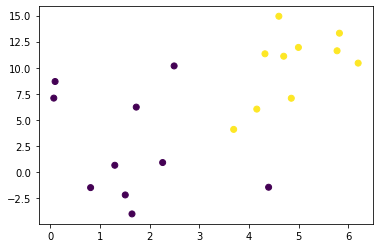

In [14]:
data = pd.read_csv('Toy.csv')
X = data[['x1','x2']].values
y = data['y'].values
plt.scatter('x1','x2',c='y',data=data)
plt.show()

In [15]:
scatter_kwargs = {'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}

오분류최소화

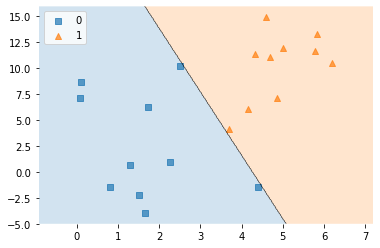

In [16]:
C=100
svm = SVC(kernel='linear', C=C, random_state=1)
svm.fit(X,y)
plot_decision_regions(X, y, clf=svm, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs)
plt.legend(loc='upper left')
plt.show()

마진 최대화

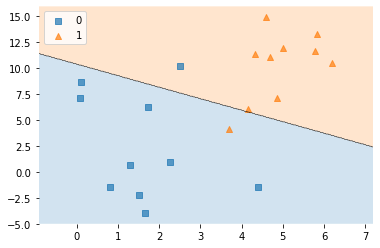

In [17]:
C=0.01
svm = SVC(kernel='linear', C=C, random_state=1)
svm.fit(X,y)
plot_decision_regions(X, y, clf=svm, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs)
plt.legend(loc='upper left')
plt.show()

# 비선형 svm

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches 
from IPython.display import Image
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings(action='ignore')

xor 예제

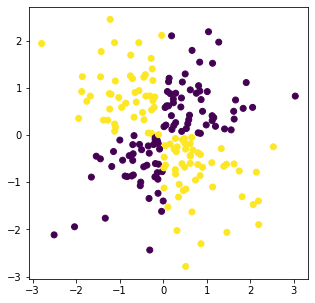

In [19]:
data = pd.read_csv('XOR.csv')
X = data[['x1','x2']].values
y = data['y'].values

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter('x1','x2',c='y',data=data)
plt.show()

In [21]:
scatter_kwargs = {'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}

In [22]:
def decision_region(gamma,C):
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=C) 
    svm.fit(X, y)
    plot_decision_regions(X, y, clf=svm, 
                          scatter_kwargs=scatter_kwargs,
                          contourf_kwargs=contourf_kwargs)
    plt.legend(loc='upper left')
    plt.title('$\gamma$ = {},  $C$ = {}'.format(gamma,C),size=10)

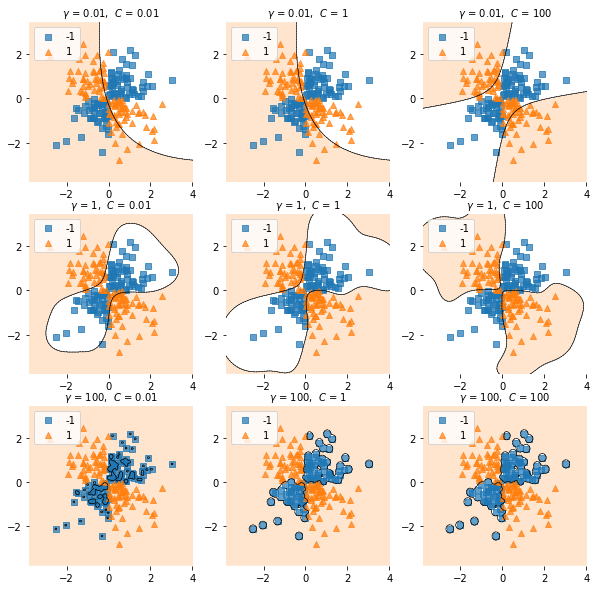

In [23]:
par_g = [0.01, 1, 100]
par_c = [0.01, 1, 100]
k = 1

plt.rcParams["figure.figsize"] = (10,10)
for gamma in par_g:
    for C in par_c:
        loc = int(str(len(par_g))+str(len(par_c))+str(k))
        k += 1
        plt.subplot(loc)
        decision_region(gamma,C)
        
plt.savefig('RBF_SVM.png', dpi=300)
plt.show()

bank예제

In [24]:
data = pd.read_csv('Bank.csv')
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

표준화

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [27]:
svm1 = SVC(kernel='linear')
svm2 = SVC(kernel='rbf', gamma='auto', C=1)
svm3 = SVC(kernel='sigmoid', gamma='auto', C=1)
svm4 = SVC(kernel='poly', gamma='auto', C=1)

svm1.fit(X_train_std, y_train)
svm2.fit(X_train_std, y_train)
svm3.fit(X_train_std, y_train)
svm4.fit(X_train_std, y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [28]:
y_pred1 = svm1.predict(X_test_std)
y_pred2 = svm2.predict(X_test_std)
y_pred3 = svm3.predict(X_test_std)
y_pred4 = svm4.predict(X_test_std)

In [29]:
def scores(y_pred):
    out = pd.Series([accuracy_score(y_test, y_pred), 
                     precision_score(y_test, y_pred),
                     recall_score(y_test, y_pred),
                     f1_score(y_test, y_pred)],
                    ['Accuracy', 'Precision', 'Recall', 'F1 score'])
    return out

In [30]:
out1 = scores(y_pred1)
out2 = scores(y_pred2)
out3 = scores(y_pred3)
out4 = scores(y_pred4)

pd.DataFrame([out1,out2,out3,out4], index=['Linear', 'RBF', 'Sigmoid', 'Polynomial'])

,Accuracy,Precision,Recall,F1 score
Linear,0.894183,0.613744,0.170957,0.267424
RBF,0.900597,0.652174,0.257426,0.369143
Sigmoid,0.849515,0.323756,0.304950,0.314072
Polynomial,0.897166,0.660377,0.184818,0.288809


secom 예제

In [31]:
data = pd.read_csv('Secom.csv')
print(data.shape)
data.head()

(1566, 591)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V582,V583,V584,V585,V586,V587,V588,V589,V590,V591
0,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
2,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
3,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
4,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1


Number of columns with missing data : 534


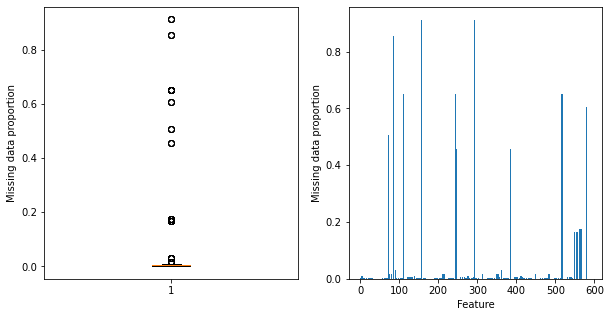

In [32]:
missing = data.isnull().sum() / len(data)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.boxplot(missing)
plt.ylabel('Missing data proportion')

plt.subplot(122)
plt.bar(range(len(data.columns)), missing)
plt.xlabel('Feature')
plt.ylabel('Missing data proportion')

print('Number of columns with missing data : %d' %sum(missing > 0))

In [33]:
data_com = data.loc[:,[x < 0.1 for x in missing]]
sum(missing >= 0.1)

52

In [34]:
data1 = data2 = data_com

data1.fillna(method = 'ffill', inplace = True)
data2.fillna(method = 'bfill', inplace = True)

In [35]:
data_com = (data1+data2)/2

In [36]:
X = data_com.iloc[:,:-1]
y = (data_com.iloc[:,-1]+1)/2

In [37]:
from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()
X2, y2 = SMOTE.fit_resample(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=1, stratify=y2)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [40]:
svm1 = SVC(kernel='linear')
svm2 = SVC(kernel='rbf', gamma='auto', C=1)
svm3 = SVC(kernel='sigmoid', gamma='auto', C=1)
svm4 = SVC(kernel='poly', gamma='auto', C=1)

svm1.fit(X_train_std, y_train)
svm2.fit(X_train_std, y_train)
svm3.fit(X_train_std, y_train)
svm4.fit(X_train_std, y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [41]:
y_pred1 = svm1.predict(X_test_std)
y_pred2 = svm2.predict(X_test_std)
y_pred3 = svm3.predict(X_test_std)
y_pred4 = svm4.predict(X_test_std)

In [42]:
out1 = scores(y_pred1)
out2 = scores(y_pred2)
out3 = scores(y_pred3)
out4 = scores(y_pred4)

pd.DataFrame([out1,out2,out3,out4], index=['Linear', 'RBF', 'Sigmoid', 'Polynomial'])

,Accuracy,Precision,Recall,F1 score
Linear,0.945330,0.901437,1.000000,0.948164
RBF,0.990888,0.982103,1.000000,0.990971
Sigmoid,0.835991,0.792079,0.911162,0.847458
Polynomial,0.905467,0.986339,0.822323,0.896894


# 최적화

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches 
from IPython.display import Image
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings(action='ignore')

In [44]:
data = pd.read_csv('Secom.csv')
print(data.shape)

(1566, 591)


In [46]:
missing = data.isnull().sum() / len(data)
data_com = data.loc[:,[x < 0.1 for x in missing]]

data1 = data2 = data_com
data1.fillna(method = 'ffill', inplace = True) # 이전 시점 값으로 대체
data2.fillna(method = 'bfill', inplace = True) # 이후 시점 값으로 대체
data_com = (data1+data2)/2

In [47]:
X = data_com.iloc[:,:-1]
y = (data_com.iloc[:,-1]+1)/2 

In [49]:
from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()
X2, y2 = SMOTE.fit_resample(X, y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=1, stratify=y2)

표준화

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), # 표준화
                     PCA(n_components=10), # PCA
                     SVC(kernel='rbf', gamma='auto', C=1)) # SVM

pipe.fit(X_train, y_train) # 표준화 + PCA + SVM
y_pred = pipe.predict(X_test) # 예측값
print('Accuracy: %.3f' % pipe.score(X_test, y_test)) # 예측 정확도

Accuracy: 0.933


k-fold

In [52]:
from sklearn.model_selection import cross_val_score

CVS = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)
print(CVS)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(CVS), np.std(CVS)))

[0.91219512 0.91707317 0.94146341 0.92682927 0.93658537 0.94634146
 0.92156863 0.90686275 0.92156863 0.89215686]
CV accuracy: 0.922 +/- 0.016


In [53]:
from sklearn.metrics import make_scorer

CVS2 = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10, scoring=make_scorer(precision_score)) # 정밀도
CVS3 = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10, scoring=make_scorer(recall_score))    # 재현율 
CVS4 = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10, scoring=make_scorer(f1_score))        # F1점수

print('CV precision: %.3f +/- %.3f' % (np.mean(CVS2), np.std(CVS2)))
print('CV recall   : %.3f +/- %.3f' % (np.mean(CVS3), np.std(CVS3)))
print('CV F1 score : %.3f +/- %.3f' % (np.mean(CVS4), np.std(CVS4)))

CV precision: 0.921 +/- 0.015
CV recall   : 0.919 +/- 0.022
CV F1 score : 0.923 +/- 0.017


In [54]:
from sklearn.model_selection import validation_curve

pipe = make_pipeline(StandardScaler(),
                     SVC(kernel='rbf', gamma='auto')) 

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, cv_scores = validation_curve(estimator=pipe, 
                                           X=X_train, y=y_train, 
                                           param_name='svc__C', 
                                           param_range=param_range, 
                                           cv=10)

In [55]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
cv_mean = np.mean(cv_scores, axis=1)
cv_std = np.std(cv_scores, axis=1)

print("Training score: ", train_mean)
print("CV score      : ", cv_mean)

Training score:  [0.6111293  0.6111293  0.90811321 0.99820785 1.         1.        ]
CV score      :  [0.6093209  0.6093209  0.88858919 0.98240316 0.9921736  0.9921736 ]


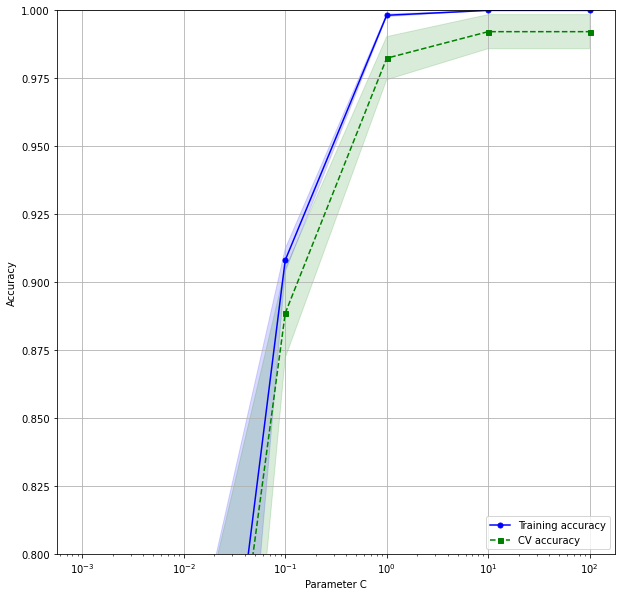

In [56]:
plt.plot(param_range, train_mean, color='b', marker='o', markersize=5, 
         label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, 
                 alpha=0.15, color='b')

plt.plot(param_range, cv_mean, color='g', linestyle='--', marker='s', markersize=5, 
         label='CV accuracy')

plt.fill_between(param_range, cv_mean + cv_std, cv_mean - cv_std, 
                 alpha=0.15, color='g')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.savefig('VC.png', dpi=300)
plt.show()

그리드 서치

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe = make_pipeline(StandardScaler(), SVC()) 

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__kernel': ['rbf'], 'svc__gamma': param_range}]

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10, 
                  n_jobs=-1) # n_jobs=-1 uses all processors
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.997556193208991
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [58]:
svm = gs.best_estimator_
svm.fit(X_train, y_train)
print('Accuracy: %.3f' % svm.score(X_test, y_test))

Accuracy: 0.998


In [59]:
#scoring = make_scorer(precision_score) # 정밀도
scoring = make_scorer(recall_score)    # 재현율 
#scoring = make_scorer(f1_score)        # F1점수

pipe = make_pipeline(StandardScaler(), SVC()) 

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__kernel': ['rbf'], 'svc__gamma': param_range}]

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring=scoring, # 다른 지표를 사용 
                  cv=10, 
                  n_jobs=-1) # n_jobs=-1 uses all processors
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

1.0
{'svc__C': 10.0, 'svc__kernel': 'linear'}


In [60]:
y_pred = gs.best_estimator_.predict(X_test)

print('Accuracy : %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall   : %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1 score : %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Accuracy : 0.944
Precision: 0.900
Recall   : 1.000
F1 score : 0.947
